In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sales_100k.csv')

In [3]:
df

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,11-07-2022,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,03-05-2024,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,01-09-2022,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,28-09-2022,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,05-01-2021,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,16-06-2022,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,09-12-2023,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,14-02-2020,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,13-12-2023,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [4]:
print("\n=== Info Dataset ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Deskripsi Statistik Numerik ===")
print(df.describe())

print("\n=== Deskripsi Statistik Kategorikal ===")
print(df.describe(include=['object']))


=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sale_ID          100000 non-null  int64  
 1   Date             100000 non-null  object 
 2   Customer_ID      100000 non-null  int64  
 3   Bike_Model       100000 non-null  object 
 4   Price            100000 non-null  float64
 5   Quantity         100000 non-null  int64  
 6   Store_Location   100000 non-null  object 
 7   Salesperson_ID   100000 non-null  int64  
 8   Payment_Method   100000 non-null  object 
 9   Customer_Age     100000 non-null  int64  
 10  Customer_Gender  100000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 8.4+ MB
None

=== Missing Values ===
Sale_ID            0
Date               0
Customer_ID        0
Bike_Model         0
Price              0
Quantity           0
Store_Location     0
Salesperson_ID     

In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

print("\nTanggal yang gagal diparse:")
print(df[df['Date'].isnull()])

df = df.dropna(subset=['Date'])

print("\nJumlah data duplikat:", df.duplicated().sum())



Tanggal yang gagal diparse:
Empty DataFrame
Columns: [Sale_ID, Date, Customer_ID, Bike_Model, Price, Quantity, Store_Location, Salesperson_ID, Payment_Method, Customer_Age, Customer_Gender]
Index: []

Jumlah data duplikat: 0


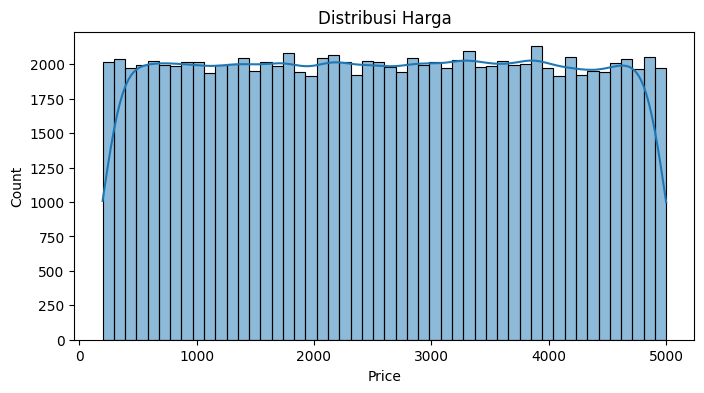

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribusi Harga')
plt.show()

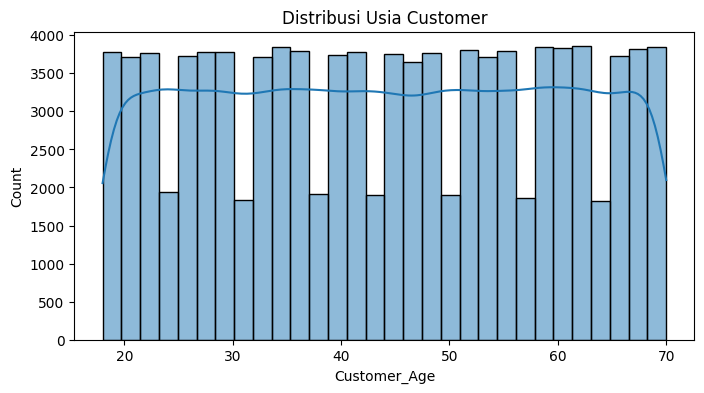

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribusi Usia Customer')
plt.show()

In [8]:
print("\nNilai unik Quantity:", df['Quantity'].unique())
print(df.groupby('Payment_Method')['Price'].sum().sort_values(ascending=False))


Nilai unik Quantity: [1 4 3 5 2]
Payment_Method
Apple Pay      43560175.14
Debit Card     43465152.78
Cash           43339432.71
Credit Card    43334315.29
Google Pay     43292139.57
PayPal         42827018.47
Name: Price, dtype: float64


In [9]:
print("\n=== Distribusi Harga ===")
print("Jumlah data  :", len(df['Price']))
print("Nilai minimum:", df['Price'].min())
print("Nilai maksimum:", df['Price'].max())
print("Rata-rata    :", df['Price'].mean())
print("Median       :", df['Price'].median())
print("Standar dev  :", df['Price'].std())
print("\nKuartil:")
print(df['Price'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))

print("\n=== Distribusi Usia Customer ===")
print("Jumlah data  :", len(df['Customer_Age']))
print("Nilai minimum:", df['Customer_Age'].min())
print("Nilai maksimum:", df['Customer_Age'].max())
print("Rata-rata    :", df['Customer_Age'].mean())
print("Median       :", df['Customer_Age'].median())
print("Standar dev  :", df['Customer_Age'].std())
print("\nKuartil:")
print(df['Customer_Age'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99]))


=== Distribusi Harga ===
Jumlah data  : 100000
Nilai minimum: 200.01
Nilai maksimum: 4999.81
Rata-rata    : 2598.1823396000004
Median       : 2598.575
Standar dev  : 1384.943132758159

Kuartil:
0.25    1399.7875
0.50    2598.5750
0.75    3795.9825
0.90    4521.6910
0.95    4758.7870
0.99    4949.7300
Name: Price, dtype: float64

=== Distribusi Usia Customer ===
Jumlah data  : 100000
Nilai minimum: 18
Nilai maksimum: 70
Rata-rata    : 44.04341
Median       : 44.0
Standar dev  : 15.313760827589247

Kuartil:
0.25    31.0
0.50    44.0
0.75    57.0
0.90    65.0
0.95    68.0
0.99    70.0
Name: Customer_Age, dtype: float64


In [10]:
Q1_age = df['Customer_Age'].quantile(0.25)
Q3_age = df['Customer_Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
upper_bound_age = Q3_age + 1.5 * IQR_age
lower_bound_age = Q1_age - 1.5 * IQR_age

outliers_age = df[(df['Customer_Age'] > upper_bound_age) | (df['Customer_Age'] < lower_bound_age)]

print("\n=== Outliers Customer_Age ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_age))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_age) / len(df)))
print("Rentang wajar usia: {:.1f} - {:.1f}".format(lower_bound_age, upper_bound_age))
print("Nilai usia minimum:", df['Customer_Age'].min())
print("Nilai usia maksimum:", df['Customer_Age'].max())

Q1_qty = df['Quantity'].quantile(0.25)
Q3_qty = df['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty
lower_bound_qty = Q1_qty - 1.5 * IQR_qty

outliers_qty = df[(df['Quantity'] > upper_bound_qty) | (df['Quantity'] < lower_bound_qty)]

print("\n=== Outliers Quantity ===")
print("Jumlah data:", len(df))
print("Jumlah outliers:", len(outliers_qty))
print("Persentase outliers: {:.2f}%".format(100 * len(outliers_qty) / len(df)))
print("Rentang wajar Quantity: {:.1f} - {:.1f}".format(lower_bound_qty, upper_bound_qty))
print("Nilai Quantity minimum:", df['Quantity'].min())
print("Nilai Quantity maksimum:", df['Quantity'].max())


=== Outliers Customer_Age ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar usia: -8.0 - 96.0
Nilai usia minimum: 18
Nilai usia maksimum: 70

=== Outliers Quantity ===
Jumlah data: 100000
Jumlah outliers: 0
Persentase outliers: 0.00%
Rentang wajar Quantity: -1.0 - 7.0
Nilai Quantity minimum: 1
Nilai Quantity maksimum: 5


In [11]:
df

,Sale_ID,Date,Customer_ID,Bike_Model,Price,Quantity,Store_Location,Salesperson_ID,Payment_Method,Customer_Age,Customer_Gender
0,1,2022-07-11,9390,Cruiser,318.32,1,Philadelphia,589,Apple Pay,70,Female
1,2,2024-05-03,3374,Hybrid Bike,3093.47,4,Chicago,390,Apple Pay,37,Male
2,3,2022-09-01,2689,Folding Bike,4247.99,3,San Antonio,338,PayPal,59,Female
3,4,2022-09-28,3797,Mountain Bike,1722.01,3,San Antonio,352,Apple Pay,19,Male
4,5,2021-01-05,1633,BMX,3941.44,3,Philadelphia,580,PayPal,67,Female
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,2022-06-16,7584,Hybrid Bike,3088.13,2,Philadelphia,116,PayPal,60,Female
99996,99997,2023-12-09,9076,Road Bike,1051.44,2,Phoenix,153,Credit Card,67,Female
99997,99998,2020-02-14,3944,Folding Bike,2783.79,4,Phoenix,124,Google Pay,37,Female
99998,99999,2023-12-13,3334,Hybrid Bike,4265.42,4,Philadelphia,610,Credit Card,57,Male


In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [13]:
def add_date_features(X):
    X_ = X.copy()
    X_['Year'] = X_['Date'].dt.year
    X_['Month'] = X_['Date'].dt.month
    X_['Day'] = X_['Date'].dt.day
    X_['Weekday'] = X_['Date'].dt.weekday
    X_['Is_Weekend'] = (X_['Weekday'] >= 5).astype(int)
    
    # Simple musim (hemisphere utara)
    X_['Season'] = X_['Month'] % 12 // 3 + 1  # 1=winter,2=spring,3=summer,4=fall
    return X_

date_features = ['Year', 'Month', 'Day', 'Weekday', 'Is_Weekend', 'Season']

In [14]:
def add_cross_features(X):
    X_ = X.copy()
    # pastikan kolom ini sudah ada
    X_['Payment_Method_x_Store_Location'] = X_['Payment_Method'] + "_" + X_['Store_Location']
    X_['Bike_Model_x_Store_Location'] = X_['Bike_Model'] + "_" + X_['Store_Location']
    X_['Payment_Method_x_Bike_Model'] = X_['Payment_Method'] + "_" + X_['Bike_Model']
    return X_

cross_features = ['Payment_Method_x_Store_Location', 
                  'Bike_Model_x_Store_Location', 
                  'Payment_Method_x_Bike_Model']


In [15]:
# Numerik asli
numeric_features = ['Price', 'Quantity', 'Customer_Age']

# Kategorikal asli
categorical_features = ['Payment_Method', 'Store_Location', 'Bike_Model']

# All categorical: asli + cross
all_categorical_features = categorical_features + cross_features

In [16]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Wide part: crossing features + original categoricals → OneHot
wide_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Deep part: original categoricals → label encoding
deep_transformer = Pipeline(steps=[
    ('labelenc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [17]:
preprocessor = Pipeline(steps=[
    # Convert Date to datetime (no leakage)
    ('to_datetime', FunctionTransformer(lambda df: df.assign(Date=pd.to_datetime(df['Date'], dayfirst=True)))),
    
    # Add date features
    ('date_features', FunctionTransformer(add_date_features)),
    
    # Add crossing features
    ('cross_features', FunctionTransformer(add_cross_features)),
    
    # Process numerik, wide cat, deep cat
    ('final_transform', ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features + date_features),            # scaled numerik
        ('wide', wide_transformer, categorical_features + cross_features),         # OneHot: wide part
        ('deep', deep_transformer, categorical_features)                           # Label encoding: deep part
    ]))
])


In [18]:
preprocessor

Pipeline(steps=[('to_datetime',
                 FunctionTransformer(func=<function <lambda> at 0x0000016826E97920>)),
                ('date_features',
                 FunctionTransformer(func=<function add_date_features at 0x0000016826E96CA0>)),
                ('cross_features',
                 FunctionTransformer(func=<function add_cross_features at 0x0000016826E97380>)),
                ('final_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Payment_Method',
                                                   'Store_Location',
                                                   'Bike_Model',
                                                   'Payment_Method_x_Store_Location',
                                                   'Bike_Model_x_Store_Location',
                                                   'Payment_Method_x_Bike_Model']),
                                                 ('deep',
                                                  Pipeline(steps=[('labelenc',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Payment_Method',
                                                   'Store_Location',
                                                   'Bike_Model'])]))])

In [19]:
print(df['Customer_Gender'].value_counts(normalize=True))


Customer_Gender
Female    0.50227
Male      0.49773
Name: proportion, dtype: float64


In [20]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\I Putu Nanda Aditya\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [21]:
df['Customer_Gender_num'] = (df['Customer_Gender'] == 'Male').astype(int)

In [22]:
from category_encoders import TargetEncoder
from sklearn.model_selection import StratifiedKFold

In [23]:
# Fitur dan target
X = df.copy()
y = df['Customer_Gender_num']

# Siapkan array hasil encode
X['Salesperson_ID_TE'] = np.nan

# KFold stratified (aman leakage)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X, y):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val = X.iloc[val_idx]
    
    # Fit encoder di training fold
    encoder = TargetEncoder(cols=['Salesperson_ID'])
    encoder.fit(X_train, y_train)
    
    # Transform validation fold
    X.loc[val_idx, 'Salesperson_ID_TE'] = encoder.transform(X_val)['Salesperson_ID']

In [24]:
final_encoder = TargetEncoder(cols=['Salesperson_ID'])
final_encoder.fit(X, y)

TargetEncoder(cols=['Salesperson_ID'])

In [25]:
from sklearn.feature_selection import VarianceThreshold

In [26]:
variance_filter = VarianceThreshold(threshold=0.01)

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

In [28]:
class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.95):
        self.threshold = threshold
        self.columns_to_keep = None

    def fit(self, X, y=None):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)  # beri nama kolom numerik default

        corr_matrix = X.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

        # drop kolom yang korelasinya > threshold
        to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
        self.columns_to_keep = [col for col in X.columns if col not in to_drop]
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X[self.columns_to_keep]

In [29]:
final_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),   # pipeline preprocessing sebelumnya (numerik, wide, deep)
    ('variance_filter', VarianceThreshold(threshold=0.01)),
    ('corr_filter', CorrelationFilter(threshold=0.95))
])

In [30]:
final_pipeline

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('to_datetime',
                                  FunctionTransformer(func=<function <lambda> at 0x0000016826E97920>)),
                                 ('date_features',
                                  FunctionTransformer(func=<function add_date_features at 0x0000016826E96CA0>)),
                                 ('cross_features',
                                  FunctionTransformer(func=<function add_cross_features at 0x0000016826E97380>)),
                                 ('final_transform',
                                  ColumnTransform...
                                                                    'Payment_Method_x_Store_Location',
                                                                    'Bike_Model_x_Store_Location',
                                                                    'Payment_Method_x_Bike_Model']),
                                                                  ('deep',
                                                                   Pipeline(steps=[('labelenc',
                                                                                    OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                   unknown_value=-1))]),
                                                                   ['Payment_Method',
                                                                    'Store_Location',
                                                                    'Bike_Model'])]))])),
                ('variance_filter', VarianceThreshold(threshold=0.01)),
                ('corr_filter', CorrelationFilter())])

In [31]:
X_train_final = final_pipeline.fit_transform(X_train)

# Cek tipe dan shape
print("Shape data akhir:", X_train_final.shape)
print("Tipe:", type(X_train_final))

# Jika hasil pipeline adalah np.ndarray (gabungan wide+deep numerik)
# split manual sesuai urutan di ColumnTransformer

Shape data akhir: (80000, 165)
Tipe: <class 'pandas.core.frame.DataFrame'>


In [32]:
# 1️⃣ Hitung jumlah kolom
n_num = len(numeric_features + date_features)    # misal 7
n_deep = len(categorical_features)               # misal 3

# 2️⃣ Jalankan pipeline
X_train_final = preprocessor.fit_transform(X_train)

# 3️⃣ Jika sparse matrix, ubah ke dense
if hasattr(X_train_final, "toarray"):
    X_train_final = X_train_final.toarray()

# 4️⃣ Split
deep_numeric = X_train_final[:, :n_num]
wide_input = X_train_final[:, n_num:-n_deep]
deep_embedding = [
    X_train_final[:, -n_deep + i].astype(int) for i in range(n_deep)
]


In [33]:
print(deep_numeric.shape)
print(np.isnan(deep_numeric).sum())
print(deep_numeric.dtype)
print('\n')
print(wide_input.shape)
print(np.unique(wide_input))
print('\n')
for i, arr in enumerate(deep_embedding):
    print(f"embedding_{i}: shape={arr.shape}, min={arr.min()}, max={arr.max()}, dtype={arr.dtype}")
print('\n')
print(np.unique(y_train))  # harus array([0,1])
print(y_train.shape)

(80000, 9)
0
float64


(80000, 153)
[0. 1.]


embedding_0: shape=(80000,), min=0, max=5, dtype=int32
embedding_1: shape=(80000,), min=0, max=6, dtype=int32
embedding_2: shape=(80000,), min=0, max=6, dtype=int32


[0 1]
(80000,)


In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input

In [35]:
n_num = 9                # jumlah fitur numerik (deep_numeric)
n_wide = 153              # jumlah dimensi wide (OneHot)
embedding_dims = [6, 7, 7]  # max index+1 per embedding kolom (max+1 dari embedding_0, embedding_1, embedding_2)
embedding_out_dim = 4    # dimensi output embedding (bisa di-tuning)

In [36]:
deep_numeric_input = Input(shape=(n_num,), name='deep_numeric')
wide_input = Input(shape=(n_wide,), name='wide_input')

embedding_inputs = []
embedding_layers = []
for i, vocab_size in enumerate(embedding_dims):
    inp = Input(shape=(1,), name=f'embedding_{i}_idx')
    embedding = layers.Embedding(input_dim=vocab_size, output_dim=embedding_out_dim, name=f'embedding_{i}')(inp)
    embedding = layers.Flatten()(embedding)
    embedding_inputs.append(inp)
    embedding_layers.append(embedding)

In [37]:
deep_concat = layers.Concatenate(name='deep_concat')([deep_numeric_input] + embedding_layers)

# Hidden layers
x = layers.Dense(128, activation='relu')(deep_concat)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)

In [38]:
wide_out = layers.Dense(1, activation=None, name='wide_linear')(wide_input)

In [39]:
combined = layers.Concatenate(name='combine_wide_deep')([x, wide_out])

# Final prediction layer
output = layers.Dense(1, activation='sigmoid', name='output')(combined)

In [40]:
model = models.Model(
    inputs=[deep_numeric_input, wide_input] + embedding_inputs,
    outputs=output
)

In [41]:
X_processed = preprocessor.transform(X_train)
print(X_processed.shape)

num_dim = len(numeric_features + date_features)
wide_dim = X_processed.shape[1] - num_dim - len(categorical_features)

deep_numeric = X_processed[:, :num_dim]                        # (N, 13)
wide_input = X_processed[:, num_dim:num_dim+wide_dim]          # (N, 149)
deep_embedding_data = X_processed[:, num_dim+wide_dim:]        # (N, 3)
deep_embedding = [deep_embedding_data[:,i].astype(int) for i in range(deep_embedding_data.shape[1])]


(80000, 165)


In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [43]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ embedding_0_idx (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1_idx (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_2_idx (InputLayer)  │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_0 (Embedding)       │ (None, 1, 4)              │              24 │ embedding_0_idx[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 1, 4)              │              28 │ embedding_1_idx[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_2 (Embedding)       │ (None, 1, 4)              │              28 │ embedding_2_idx[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ deep_numeric (InputLayer)     │ (None, 9)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 4)                 │               0 │ embedding_0[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 4)                 │               0 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_2 (Flatten)           │ (None, 4)                 │               0 │ embedding_2[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ deep_concat (Concatenate)     │ (None, 21)                │               0 │ deep_numeric[0][0],        │
│                               │                           │                 │ flatten[0][0],             │
│                               │                           │                 │ flatten_1[0][0],           │
│                               │                           │                 │ flatten_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 128)               │           2,816 │ deep_concat[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 128)               │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 64)                │           8,256 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ wide_input (InputLayer)       │ (None, 153)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 64)                │               

 Total params: 11,372 (44.42 KB)

 Trainable params: 11,372 (44.42 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
from tensorflow.keras.callbacks import EarlyStopping


In [45]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,      # berhenti training jika 10 epoch berturut-turut val_loss tidak membaik
    restore_best_weights=True
)

In [46]:
history = model.fit(
    x={
        'deep_numeric': deep_numeric,
        'wide_input': wide_input,
        'embedding_0_idx': deep_embedding[0],
        'embedding_1_idx': deep_embedding[1],
        'embedding_2_idx': deep_embedding[2],
    },
    y=y_train,
    batch_size=256,
    epochs=300,                # biarkan cukup besar
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4971 - auc: 0.4988 - loss: 0.6995 - val_accuracy: 0.5026 - val_auc: 0.5036 - val_loss: 0.6933
Epoch 2/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5082 - auc: 0.5071 - loss: 0.6941 - val_accuracy: 0.4988 - val_auc: 0.4996 - val_loss: 0.6934
Epoch 3/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5032 - auc: 0.5054 - loss: 0.6934 - val_accuracy: 0.5070 - val_auc: 0.5000 - val_loss: 0.6931
Epoch 4/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5058 - auc: 0.5020 - loss: 0.6936 - val_accuracy: 0.5025 - val_auc: 0.5012 - val_loss: 0.6934
Epoch 5/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5114 - auc: 0.5143 - loss: 0.6929 - val_accuracy: 0.4991 - val_auc: 0.5028 - val_loss: 0.6935
Epoch 6/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5148 - auc: 0.5201 - loss: 0.6925 - val_accuracy: 0.5029 - val_auc: 0.5000 - val_loss: 0.6932
Epoch 7/300
250/250 ━━━━━━━━━━━━━

In [52]:
# Ambil OneHotEncoder dari pipeline
wide_encoder = preprocessor.named_steps['final_transform'].transformers_[1][1]  # ambil OneHotEncoder

# Ambil nama kolom hasil OneHotEncoder
wide_feature_names = wide_encoder.get_feature_names_out()

print('wide_feature_names:', len(wide_feature_names))
print('wide_weights:', len(wide_weights))

# Harus sama panjang
assert len(wide_feature_names) == len(wide_weights)

# Buat DataFrame
df_wide_importance = pd.DataFrame({
    'feature': wide_feature_names,
    'coef': wide_weights
}).sort_values(by='coef', key=abs, ascending=False)

print(df_wide_importance.head(10))


wide_feature_names: 153
wide_weights: 153
                                               feature      coef
127  Payment_Method_x_Bike_Model_Credit Card_Electr...  0.201445
64         Bike_Model_x_Store_Location_BMX_Los Angeles -0.195347
137  Payment_Method_x_Bike_Model_Debit Card_Mountai... -0.191083
68         Bike_Model_x_Store_Location_BMX_San Antonio -0.188064
72        Bike_Model_x_Store_Location_Cruiser_New York  0.185249
147         Payment_Method_x_Bike_Model_PayPal_Cruiser -0.184413
18                            Bike_Model_Mountain Bike  0.181904
129  Payment_Method_x_Bike_Model_Credit Card_Hybrid...  0.181470
108  Bike_Model_x_Store_Location_Road Bike_Philadel... -0.180698
85   Bike_Model_x_Store_Location_Folding Bike_Los A...  0.178676


C:\Users\I Putu Nanda Aditya\AppData\Local\Temp\ipykernel_15288\1674461675.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


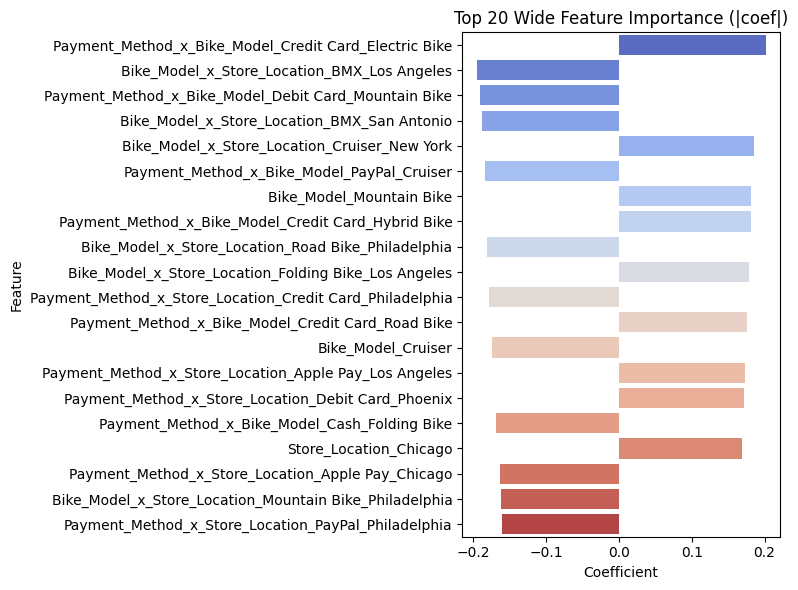

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_wide_importance.head(top_n),
    x='coef', y='feature', palette='coolwarm'
)
plt.title(f'Top {top_n} Wide Feature Importance (|coef|)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [55]:
# Contoh ambil embedding_0 layer
embedding_weights = model.get_layer('embedding_0').get_weights()[0]

print('Shape:', embedding_weights.shape)
print('Sample:\n', embedding_weights[:5])


Shape: (6, 4)
Sample:
 [[ 0.02729529 -0.03576985 -0.0816598   0.0123576 ]
 [-0.04384475 -0.09270799 -0.03514387  0.02203755]
 [ 0.00563088  0.05702686  0.01956555  0.03366733]
 [-0.05262883 -0.0124431   0.02022782 -0.07522783]
 [-0.03138135 -0.07612521 -0.00372204 -0.08921734]]


In [56]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
ROC AUC: 0.5177861254047611
Confusion matrix:
 [[29822 10360]
 [28795 11023]]
              precision    recall  f1-score   support

           0       0.51      0.74      0.60     40182
           1       0.52      0.28      0.36     39818

    accuracy                           0.51     80000
   macro avg       0.51      0.51      0.48     80000
weighted avg       0.51      0.51      0.48     80000



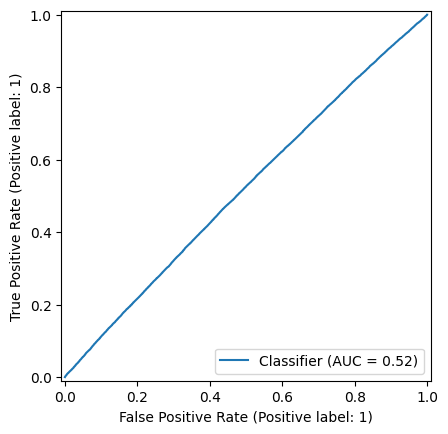

In [57]:
# y_pred_prob: prediksi probabilitas
y_pred_prob = model.predict({
    'deep_numeric': deep_numeric,
    'wide_input': wide_input,
    'embedding_0_idx': deep_embedding[0],
    'embedding_1_idx': deep_embedding[1],
    'embedding_2_idx': deep_embedding[2],
})
y_pred = (y_pred_prob > 0.5).astype(int)

print('ROC AUC:', roc_auc_score(y_train, y_pred_prob))
print('Confusion matrix:\n', confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

# ROC curve
RocCurveDisplay.from_predictions(y_train, y_pred_prob)
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


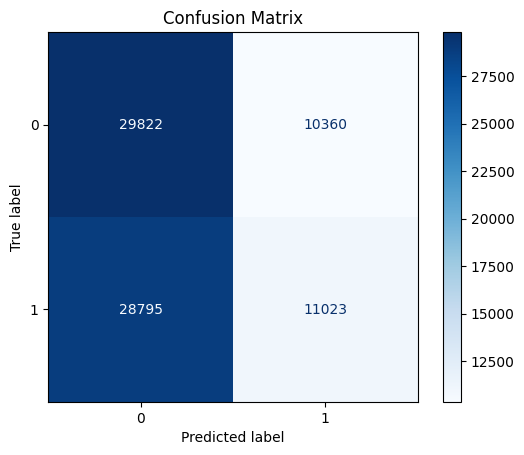

In [60]:
# ⚠️ Pastikan prediksi sesuai data training / test yang kamu gunakan
y_pred_prob = model.predict({
    'deep_numeric': deep_numeric,
    'wide_input': wide_input,
    'embedding_0_idx': deep_embedding[0],
    'embedding_1_idx': deep_embedding[1],
    'embedding_2_idx': deep_embedding[2],
})

# Threshold 0.5 → prediksi kelas
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Hitung confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()